# **1. LSTM**
LSTM(Long Short-Term Memory)은 RNN의 장기 의존성 문제를 해결하기 위해 고안된 모델입니다. LSTM은 셀 상태(cell state)와 3개의 게이트(입력 게이트, 출력 게이트, 망각 게이트)를 사용하여 중요한 정보를 오랫동안 저장하고 불필요한 정보를 제거하는 구조를 갖추고 있습니다. 망각 게이트는 이전 셀 상태에서 필요 없는 정보를 삭제하고, 입력 게이트는 새로운 정보를 저장하며, 출력 게이트는 최종 출력을 결정합니다. 이러한 구조 덕분에 LSTM은 장기 시퀀스를 다루는 자연어 처리, 음성 인식, 시계열 예측 등의 다양한 분야에서 효과적으로 사용됩니다. 하지만 구조가 복잡하여 계산량이 많고, 학습 시간이 오래 걸린다는 단점이 있습니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FcZc3hM%2FbtsMdnHhWNo%2FAAAAAAAAAAAAAAAAAAAAAF4oC6n3Ej3NTx0j2gyx0wMXYTBr1UsoM47l5nW0rhiE%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3DIQZ4YftXtXcG7UMmf7%252FlGsbLHRk%253D' width=600>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FrEcov%2FbtsMcfJ7ypD%2FAAAAAAAAAAAAAAAAAAAAAA_hhR3wl82-F2L8NpK3KgCmAitfjPvvBVPlHmCM0Qqa%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3DG%252BRjorMF2JqROTf36QAqBN4hM8Y%253D' width=600>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2Fc0UfdJ%2FbtsMbvzYRoa%2FAAAAAAAAAAAAAAAAAAAAABSqIEt2nKqOBSPSrwssEt3Fj1U3-Zhl_Q3qIuwGrJEi%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3Dq6Z12Ngbo5eYHFKo45ct05k2m3k%253D' width=600>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FmO13q%2FbtsMb2KTCga%2FAAAAAAAAAAAAAAAAAAAAALDj8v9eANrsxwU1xHHsx5rfL1aHFJkqVzEP1W6ksxW8%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3DcrdV2i07ZKHYvipM9mlq%252Fn8n9%252Bo%253D' width=600>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2Fb9bjBZ%2FbtsMdpkGm9X%2FAAAAAAAAAAAAAAAAAAAAAIrclRHvdFSePFPSXJBBQ6N8WGgiRLAkI49ZlBVTuDTO%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3DJMem%252F8kMHQ1oUdNRB3wI3msNcO0%253D' width=600>

In [1]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 47.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.2/591.2 kB 26.1 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=ccaed9d3d512093023e6acd731c9761f686e1999c4ab789e6b7b64d42d9ca768
  Stored in directory: /root/.cache/pip/wheels/62/0e/84/39e1c8bf2f2da63964fe43fb2932027d6344f8766edf28bc8c
Successfully built mecab-python
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   523k      0  0:00:02  0:00:02 --:--:--  749k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/exam

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import re
from konlpy.tag import Mecab
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# 데이터 로드
url = 'https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt'
data = pd.read_table(url, names=['rating', 'review'])

# 3점 리뷰 제거 후 긍정(1), 부정(0) 라벨링
data = data[data['rating'] != 3]
data['label'] = np.where(data['rating'] > 3, 1, 0)

# 한글 텍스트만 남기기
def preprocess_text(text):
    text = re.sub(r'[^가-힣\s]', '', text)
    return text

data['review'] = data['review'].apply(preprocess_text)

# 형태소 분석기 적용
mecab = Mecab()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를']

def tokenize(text):
    tokens = mecab.morphs(text)
    return [token for token in tokens if token not in stopwords]

data['tokenized'] = data['review'].apply(tokenize)

In [4]:
# 단어 사전 생성
all_tokens = [token for tokens in data['tokenized'] for token in tokens]
all_tokens

['배공',
 '빠르',
 '굿',
 '택배',
 '엉망',
 '네',
 '용',
 '저희',
 '집',
 '밑',
 '층',
 '말',
 '없이',
 '놔두',
 '아주',
 '좋',
 '아요',
 '바지',
 '정말',
 '좋',
 '아서',
 '개',
 '더',
 '구매',
 '했',
 '어요',
 '가격',
 '대박',
 '입니다',
 '바느질',
 '조금',
 '엉성',
 '긴',
 '지만',
 '편하',
 '성비',
 '최고',
 '예요',
 '선물',
 '용',
 '으로',
 '빨리',
 '받',
 '아서',
 '전달',
 '했어야',
 '상품',
 '었',
 '는데',
 '머그',
 '컵',
 '만',
 '와서',
 '당황',
 '했',
 '습니다',
 '전화',
 '했',
 '더니',
 '바로',
 '주',
 '신다',
 '했',
 '지만',
 '배송',
 '누락',
 '되',
 '어',
 '있',
 '었',
 '네요',
 '확인',
 '안',
 '바로',
 '선물',
 '했',
 '으면',
 '큰일날',
 '뻔',
 '했',
 '네요',
 '이렇게',
 '배송',
 '오래',
 '걸렸',
 '으면',
 '사',
 '거',
 '다시',
 '생각',
 '했',
 '거',
 '같',
 '아요',
 '아쉽',
 '네요',
 '민트',
 '색상',
 '예뻐요',
 '옆',
 '손잡이',
 '거',
 '용도',
 '로',
 '사용',
 '되',
 '네요',
 '비추',
 '합니다',
 '계란',
 '뒤집',
 '때',
 '완전',
 '불편',
 '해요',
 '코팅',
 '묻어나',
 '보',
 '기',
 '엔',
 '예쁘',
 '실용',
 '적',
 '으로',
 '보였',
 '는데',
 '생각',
 '보다',
 '진짜',
 '별로',
 '입니다',
 '주문',
 '월',
 '시켰',
 '는데',
 '월일',
 '배송',
 '왔',
 '네요',
 '여기',
 '회사',
 '측',
 '과',
 '전화',
 '안',
 '되',
 '아무런',
 '연락',
 '

In [5]:
vocab = Counter(all_tokens)
vocab_size = len(vocab) + 2  # 패딩(0), OOV(1) 고려

word_to_index = {word: idx + 2 for idx, (word, _) in enumerate(vocab.most_common())}
word_to_index['<PAD>'] = 0
word_to_index['<OOV>'] = 1

# 정수 인코딩
def encode_tokens(tokens):
    return [word_to_index.get(token, 1) for token in tokens]

data['encoded'] = data['tokenized'].apply(encode_tokens)

# 패딩 적용
max_len = 100

def pad_sequence(seq, max_len):
    return seq[:max_len] + [0] * (max_len - len(seq))

data['padded'] = data['encoded'].apply(lambda x: pad_sequence(x, max_len))

In [6]:
data['padded']

,padded
0,"[9338, 74, 166, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[226, 557, 185, 104, 564, 186, 594, 1743, 209,..."
2,"[102, 3, 6, 569, 95, 3, 46, 66, 61, 9, 15, 4, ..."
3,"[163, 104, 37, 295, 62, 46, 3079, 4104, 93, 40..."
4,"[2358, 174, 297, 617, 539, 18, 997, 31, 33, 22..."
...,...
199995,"[7139, 59, 943, 138, 17, 27, 6, 0, 0, 0, 0, 0,..."
199996,"[7090, 385, 9, 15, 4, 7090, 2880, 19042, 3436,..."
199997,"[4164, 12543, 71, 67, 29, 39, 22688, 88, 2, 37..."
199998,"[91, 198, 1907, 11071, 22, 240, 2, 0, 0, 0, 0,..."


In [7]:
class ReviewDataset(Dataset):
    def __init__(self, reviews, labels):
        self.reviews = torch.tensor(reviews, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.float)

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        return self.reviews[idx], self.labels[idx]

In [8]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(data['padded'].tolist(), data['label'].tolist(), test_size=0.2, random_state=42)

# DataLoader
batch_size = 64
train_dataset = ReviewDataset(X_train, y_train)
test_dataset = ReviewDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
len(train_dataset), len(test_dataset)

(160000, 40000)

In [10]:
train_dataset[0], test_dataset[0]

((tensor([  873,   121,  4992,  4579,   288,   970,  1985,  2406,  8775,   377,
            401,  1686,   134,    47,    17,    60, 10408,    58,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
  tensor(1.)),
 (tensor([ 259,   10,    3,    6,  932,  113, 1021,  583,  100,  212, 1160,    8,
             2,  192,   62,   25,  183,   46,   45,  305,    0,    0,    0,    0,
             0,    

In [11]:
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, batch_first=True, dropout=dropout)
        self.batch_norm = nn.BatchNorm1d(hidden_dim)  # 배치 정규화 추가
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        out = self.batch_norm(lstm_out[:, -1, :])  # 배치 정규화 적용
        out = self.fc(out)
        return out  # BCEWithLogitsLoss 내부에서 sigmoid 적용됨

# 모델 초기화
embedding_dim = 128
hidden_dim = 512  # 은닉 차원 증가
output_dim = 1
n_layers = 2
dropout = 0.2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SentimentLSTM(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout)
model.to(device)

SentimentLSTM(
  (embedding): Embedding(41130, 128)
  (lstm): LSTM(128, 512, num_layers=2, batch_first=True, dropout=0.2)
  (batch_norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=512, out_features=1, bias=True)
)

### AdamW
* Adam: 학습할 때 가중치를 업데이트하면서 L2 정규화를 하는데, 이 정규화를 잘못된 방식으로 처리되어 실제로 L2 정규화가 적용되지 않을 때가 있음(학습 + 정규화)
* AdamW: 정규화를 빼고 다시 만든 방식(Adam + weight decay를 분리해서 정확히 적용)

> adam보다 더 안정적이고 잘 동작함. 특히 Transformer 계열, BERT, GPT 등 adamW를 씀 [[논문]](https://arxiv.org/abs/1711.05101)

In [12]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

In [15]:
def train_model(model, train_loader, criterion, optimizer, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        epoch_loss = 0
        correct = 0
        total = 0

        for reviews, labels in train_loader:
            reviews, labels = reviews.to(device), labels.to(device)

            optimizer.zero_grad()
            predictions = model(reviews).squeeze()
            loss = criterion(predictions, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            preds = (torch.sigmoid(predictions) >= 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_acc = correct / total
        print(f'Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Accuracy: {epoch_acc:.4f}')

# 학습 실행
train_model(model, train_loader, criterion, optimizer, 10)

Epoch 1/10, Loss: 0.1106, Accuracy: 0.9636
Epoch 2/10, Loss: 0.0882, Accuracy: 0.9714
Epoch 3/10, Loss: 0.0727, Accuracy: 0.9761
Epoch 4/10, Loss: 0.0612, Accuracy: 0.9796
Epoch 5/10, Loss: 0.0512, Accuracy: 0.9827
Epoch 6/10, Loss: 0.0448, Accuracy: 0.9846
Epoch 7/10, Loss: 0.0383, Accuracy: 0.9864
Epoch 8/10, Loss: 0.0341, Accuracy: 0.9880
Epoch 9/10, Loss: 0.0307, Accuracy: 0.9892
Epoch 10/10, Loss: 0.0292, Accuracy: 0.9899


In [16]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    predictions_list = []
    labels_list = []

    with torch.no_grad():
        for reviews, labels in test_loader:
            reviews, labels = reviews.to(device), labels.to(device)
            predictions = model(reviews).squeeze()
            preds = (predictions >= 0.5).float()

            correct += (preds == labels).sum().item()
            total += labels.size(0)

            predictions_list.extend(preds.cpu().numpy())
            labels_list.extend(labels.cpu().numpy())

    accuracy = accuracy_score(labels_list, predictions_list)
    print(f'Test Accuracy: {accuracy:.4f}')

# 평가 실행
evaluate_model(model, test_loader)

Test Accuracy: 0.9069


In [17]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    predictions_list = []
    labels_list = []

    with torch.no_grad():
        for reviews, labels in test_loader:
            reviews, labels = reviews.to(device), labels.to(device)
            predictions = model(reviews).squeeze()
            preds = (predictions >= 0.5).float()

            correct += (preds == labels).sum().item()
            total += labels.size(0)

            predictions_list.extend(preds.cpu().numpy())
            labels_list.extend(labels.cpu().numpy())

    accuracy = accuracy_score(labels_list, predictions_list)
    print(f'Test Accuracy: {accuracy:.4f}')

# 평가 실행
evaluate_model(model, test_loader)


import torch

def predict_sentiment(model, sentence):
    model.eval()
    tokens = tokenize(sentence)
    encoded = encode_tokens(tokens)
    padded = pad_sequence(encoded, max_len)

    input_tensor = torch.tensor([padded], dtype=torch.long).to(device)

    with torch.no_grad():
        prediction = model(input_tensor).item()
        probability = torch.sigmoid(torch.tensor(prediction)).item()  # 확률로 변환

    sentiment = "긍정" if probability >= 0.5 else "부정"
    print(f"입력 문장: {sentence}")
    print(f"예측 확률: {probability:.4f} ({sentiment})")

# 테스트
test_sentences = [
    "이 제품 정말 좋아요! 추천합니다.",
    "완전 별로예요. 사지 마세요.",
    "기대 이하입니다. 실망했어요."
]

for sentence in test_sentences:
    predict_sentiment(model, sentence)

Test Accuracy: 0.9069
입력 문장: 이 제품 정말 좋아요! 추천합니다.
예측 확률: 0.9998 (긍정)
입력 문장: 완전 별로예요. 사지 마세요.
예측 확률: 0.0007 (부정)
입력 문장: 기대 이하입니다. 실망했어요.
예측 확률: 0.0016 (부정)


# **2. GRU**
GRU(Gated Recurrent Unit)는 2014년 뉴욕대학교(NYU) 조경현(Kyunghyun Cho) 교수 연구팀이 제안한 RNN의 장기 의존성 문제를 해결하기 위해 개발한 신경망 구조입니다. LSTM과 유사한 성능을 가지면서도 더 간단한 구조를 갖고 있어 연산량이 적고 학습 속도가 빠릅니다. GRU는 업데이트 게이트(Update Gate)와 리셋 게이트(Reset Gate)라는 두 개의 게이트만을 사용하여 정보를 조절하며, LSTM보다 파라미터 수가 적어 적은 데이터셋에서도 효과적으로 학습할 수 있습니다. 업데이트 게이트는 이전 정보를 얼마나 유지할지 결정하고, 리셋 게이트는 새로운 정보를 반영하기 위해 기존 정보를 얼마나 잊을지 조정합니다. 이러한 특성 덕분에 GRU는 텍스트 처리, 음성 인식, 시계열 예측 등에서 LSTM보다 더 빠르고 효율적으로 사용할 수 있지만, 장기 의존성이 중요한 경우 LSTM이 더 나은 성능을 보일 수도 있습니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FPevsT%2FbtsMcHGdA4O%2FAAAAAAAAAAAAAAAAAAAAAE8EH4nTzqsfSGhp9X3OujNDYktMvEnnZPdFuq_vRTM2%2Fimg.jpg%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3DGJbmovZWruN%252FN8o6CaiSjKmFyDo%253D' width=600>

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FdD3nxq%2FbtsMbVSJZ5d%2FAAAAAAAAAAAAAAAAAAAAAPO0etsLUUbl-8EHGDzbaSSVQqQl3lKLYKwpZKRU4HO0%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3D4HUlEoIUkt0R%252BsS7iwjyUOIIFoQ%253D' width=600>

In [18]:
class SentimentGRU(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super(SentimentGRU, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTM -> GRU 변경
        self.gru = nn.GRU(embedding_dim, hidden_dim, num_layers=n_layers, batch_first=True, dropout=dropout, bidirectional=True)
        self.batch_norm = nn.BatchNorm1d(hidden_dim * 2)  # 배치 정규화 추가
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, _ = self.gru(embedded)  # GRU 실행
        out = self.batch_norm(gru_out[:, -1, :])  # 마지막 타임스텝의 출력 사용
        out = self.fc(out)
        return out  # BCEWithLogitsLoss 내부에서 sigmoid 적용됨

# 모델 초기화
embedding_dim = 128
hidden_dim = 512
output_dim = 1
n_layers = 2
dropout = 0.2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SentimentGRU(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout)
model.to(device)

SentimentGRU(
  (embedding): Embedding(41130, 128)
  (gru): GRU(128, 512, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (batch_norm): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

###Bidirectional

Bidirectional(양방향) RNN은 순방향(forward)과 역방향(backward)으로 정보를 처리하여 입력 시퀀스의 과거와 미래 정보를 모두 활용하는 방식으로, 일반적인 단방향 RNN이 과거에서 현재로만 정보를 전달하는 것과 달리, Bidirectional RNN은 역방향으로도 학습하여 보다 풍부한 문맥 정보를 학습할 수 있어 자연어 처리(NLP)와 시계열 분석에서 유용하게 사용됩니다.  (bidirectional=True 옵션만 추가하면 Bidirectional RNN, LSTM/GRU를 사용할 수 있습니다.)

# **3. LSTM + CNN**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [23]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [24]:
# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3872 - loss: 2.4553 - val_accuracy: 0.5200 - val_loss: 1.8152
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5559 - loss: 1.7232 - val_accuracy: 0.5917 - val_loss: 1.6150
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6117 - loss: 1.5316 - val_accuracy: 0.6411 - val_loss: 1.4426
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6602 - loss: 1.3438 - val_accuracy: 0.6625 - val_loss: 1.3341
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6999 - loss: 1.1937 - val_accuracy: 0.6888 - val_loss: 1.2360
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7358 - loss: 1.0415 - val_accuracy: 0.7026 - val_loss: 1.1767
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7682 - loss: 0.9111 - val_accuracy: 0.7195 - val_loss: 1.1070
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7966 - loss: 0.8256 - val_

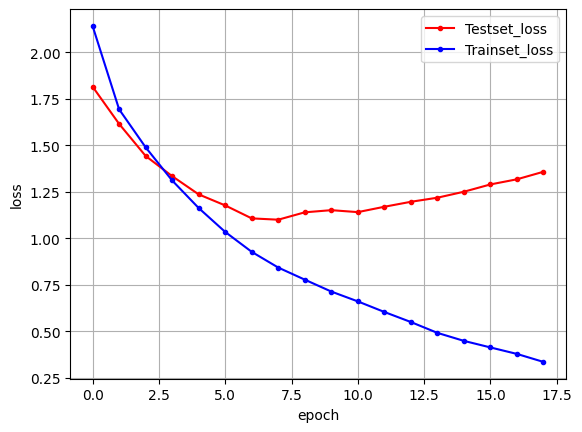

In [25]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [32]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
# 웹사이트의 영화 리뷰
# 긍정(1) 또는 부정(0)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [34]:
# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [35]:
# 모델의 구조를 설정합니다.
model = Sequential([
    Input(shape=(None,)),
    Embedding(5000, 100),
    Dropout(0.5),
    Conv1D(64, 5, padding='valid', activation='relu', strides=1),
    MaxPooling1D(pool_size=4),
    LSTM(55),
    Dense(1),
    Activation('sigmoid')
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, None, 100)      │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, None, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, None, 64)       │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 55)             │        26,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 558,520 (2.13 MB)

 Trainable params: 558,520 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

###CNN 뒤에 LSTM을 둔 이유
Conv1D를 먼저 두는 이유는 문장 속 국소 패턴(n-그램)을 빠르게 추출하고(예: 부정 표현, 강한 형용사 등), MaxPooling으로 시간 축을 압축해 노이즈를 줄이고 연산량을 크게 낮춘 뒤 그 순차적 특징열을 LSTM에 넘겨 장기 의존성과 순서 정보를 학습하게 하려는 설계이기 때문입니다. 이렇게 하면 LSTM이 처음부터 긴 시퀀스 전체를 처리하지 않아도 되어 학습이 더 안정적이고 빠르며, CNN이 잡은 국소 의미와 LSTM이 학습한 전역 문맥을 결합해 성능과 효율을 동시에 얻을 수 있습니다.

In [36]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6636 - loss: 0.5600 - val_accuracy: 0.8787 - val_loss: 0.2956
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9052 - loss: 0.2398 - val_accuracy: 0.8968 - val_loss: 0.2522
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9309 - loss: 0.1810 - val_accuracy: 0.8789 - val_loss: 0.2961
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9478 - loss: 0.1454 - val_accuracy: 0.8893 - val_loss: 0.2849
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9647 - loss: 0.1064 - val_accuracy: 0.8917 - val_loss: 0.3063
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9719 - loss: 0.0810 - val_accuracy: 0.8888 - val_loss: 0.3486
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9781 - loss: 0.0701 - val_accuracy: 0.8861 - val_loss: 0.3937
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9822 - loss: 0.05

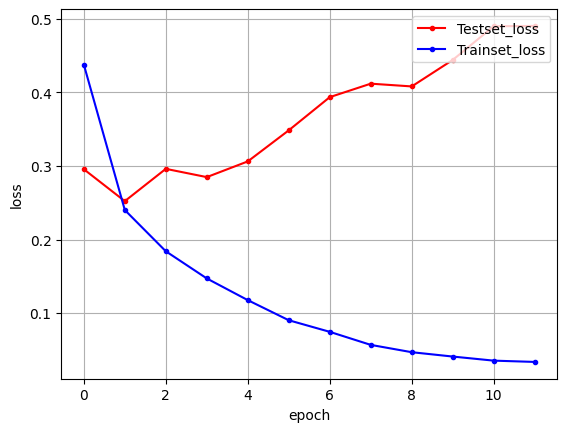

In [37]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()